### 实现 Simple Linear Regression

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [7]:
x = np.array([1,2,3,4,5,6,7])
y = np.array([1,3,2,3,4,3,5])

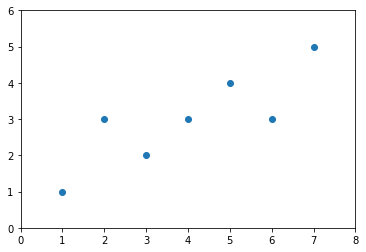

In [8]:
plt.scatter(x, y)
plt.axis([0, 8, 0, 6])
plt.show()

In [10]:
x_mean = np.mean(x)
y_mean = np.mean(y)

In [12]:
num = 0.0
d = 0.0
for x_i, y_i in zip(x, y):
    num += (x_i - x_mean) * (y_i - y_mean)
    d += (x_i - x_mean)**2
a = num / d
b = y_mean - a * x_mean
print(a, b)

0.5 1.0


In [13]:
y_hat = a * x + b

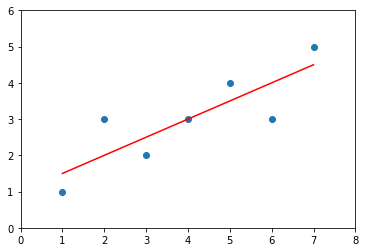

In [14]:
plt.scatter(x, y)
plt.plot(x, y_hat, color='red')
plt.axis([0, 8, 0, 6])
plt.show()

In [39]:
x_predict = 6
y_predict = a * x_predict + b
print(y_predict)

4.0


### 使用sklearn的思想，对Simple Linear Regression算法进行封装

In [61]:
import numpy as np


class SimpleLinearRegression1:
    
    def __init__(self):
        """初始化Simple Linear Regression模型"""
        self.a_ = None
        self.b_ = None
        
    def fit(self, x_train, y_train):
        """根据训练数据集x_train，y_train训练Simple Linear Regression模型"""
        assert x_train.ndim == 1, "Simple Linear Regressin can only solve simple feature training data."
        assert len(x_train) == len(y_train), "The size of x_train must be equal to the size of y_train."
        
        x_mean = np.mean(x_train)
        y_mean = np.mean(y_train)
        
        num =0.0
        d = 0.0
        
        for x, y in zip(x_train, y_train):
            num += (x - x_mean) * (y - y_mean)
            d += (x - x_mean) ** 2
            
        self.a_ = num / d
        self.b_ = y_mean - self.a_ * x_mean

        return self
    
    def predict(self, x_predict):
        """给定数据集x_train，返回表示x_predict的结果向量"""
        assert x_predict.ndim == 1, "Simple Linear Regressin can only simple feature training data."
        assert self.a_ is not None and self.b_ is not None, "Must fit before predict!"
        
        return np.array([self._predict(x) for x in x_predict])
    
    def _predict(self, x_single):
        """给定单个待测数据x_single，返回x_simgle的预测结果"""
        return self.a_ * x_single + self.b_
    
    def __repr__(self):
        return "Simgle Liner Regression1 \n"

In [62]:
reg1 = SimpleLinearRegression1()
reg1.fit(x, y)
print(reg1.a_, reg1.b_)

0.5 1.0


In [67]:
reg1.predict(np.array([x_predict]))

array([4.])

In [68]:
y_hat1 = reg1.predict(x)

##### 注：画图之前，需要先对x_train的所有数据，带入到模型中，得到y的预测值

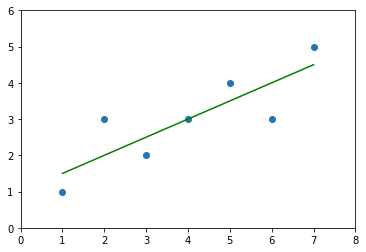

In [71]:
plt.scatter(x, y)
plt.plot(x, y_hat1, color='green')
plt.axis([0, 8, 0, 6])
plt.show()

###### Simple Linear Regression 的向量化运算

In [72]:
import numpy as np


class SimpleLinearRegression2:
    
    def __init__(self):
        """初始化Simple Linear Regression模型"""
        self.a_ = None
        self.b_ = None
        
    def fit(self, x_train, y_train):
        """根据训练数据集x_train，y_train训练Simple Linear Regression模型"""
        assert x_train.ndim == 1, "Simple Linear Regressin can only solve simple feature training data."
        assert len(x_train) == len(y_train), "The size of x_train must be equal to the size of y_train."
        
        x_mean = np.mean(x_train)
        y_mean = np.mean(y_train)
        
        num = (x_train - x_mean).dot(y_train - y_mean)
        d = (x_train - x_mean).dot(x_train - x_mean)
            
        self.a_ = num / d
        self.b_ = y_mean - self.a_ * x_mean
        
        return self
    
    def predict(self, x_predict):
        """给定数据集x_train，返回表示x_predict的结果向量"""
        assert x_predict.ndim == 1, "Simple Linear Regressin can only simple feature training data."
        assert self.a_ is not None and self.b_ is not None, "Must fit before predict!"
        
        return np.array([self._predict(x) for x in x_predict])
    
    def _predict(self, x_single):
        """给定单个待测数据x_single，返回x_simgle的预测结果"""
        return self.a_ * x_single + self.b_
    
    def __repr__(self):
        return "Simgle Liner Regression2 \n"

In [74]:
reg2 = SimpleLinearRegression2()
reg2.fit(x, y)

Simgle Liner Regression2 

In [76]:
print(reg2.a_, reg2.b_)

0.5 1.0


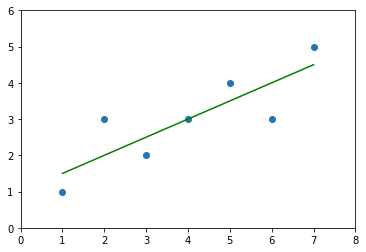

In [77]:
y_hat1 = reg1.predict(x)

plt.scatter(x, y)
plt.plot(x, y_hat1, color='green')
plt.axis([0, 8, 0, 6])
plt.show()

#### 向量化实现的性能测试

In [78]:
m = 1000000
big_x = np.random.random(size=m)
big_y = big_x * 2.0 + 3.0 + np.random.normal(size=m)

In [79]:
% timeit reg1.fit(big_x, big_y)
% timeit reg2.fit(big_x, big_y)

1.09 s ± 20.1 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
16.8 ms ± 200 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [80]:
print(reg1.a_, reg1.b_)
print(reg2.a_, reg2.b_)

2.0024005044743194 2.9985331959841033
2.0024005044743456 2.9985331959840904


#### MSE 均方误差（量纲问题）

#### RMSE 均方根误差    MAE 平均绝对 误差

### 衡量回归的标准

In [83]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

#### 波士顿房产数据

In [84]:
boston = datasets.load_boston()
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [85]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [86]:
x = boston.data[:,5]   # 只是用房间数量这个特征

In [87]:
x.shape

(506,)

In [88]:
y = boston.target

In [89]:
y.shape

(506,)

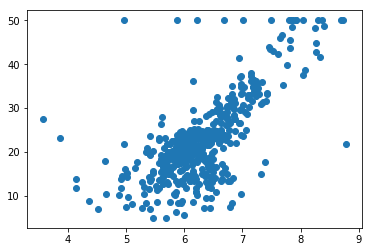

In [91]:
plt.scatter(x, y)
plt.show()

In [92]:
np.max(y)

50.0

In [93]:
x = x[y < 50]
y = y[y < 50]
print(x.shape, y.shape)

(490,) (490,)


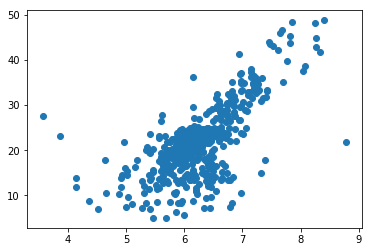

In [94]:
plt.scatter(x, y)
plt.show()

#### 使用简单线性回归算法

In [99]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=666)


In [100]:
x_train.shape

(392,)

In [101]:
x_test.shape

(98,)

In [104]:
reg = SimpleLinearRegression2()
reg.fit(x_train, y_train)

Simgle Liner Regression2 

In [105]:
print(reg.a_, reg.b_)

7.8608543562689555 -27.459342806705543


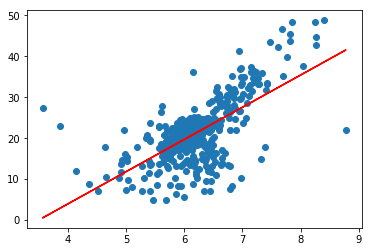

In [106]:
plt.scatter(x_train, y_train)
plt.plot(x_train, reg.predict(x_train), color = 'red')
plt.show()

In [108]:
y_predict = reg.predict(x_test)

#### MSE

In [109]:
mse_test = np.sum((y_predict - y_test) ** 2) / len(y_test)
print(mse_test)

24.156602134387438


#### RNSE

In [110]:
from math import sqrt

rmse_test = sqrt(mse_test)
print(rmse_test)

4.914936635846635


#### MAE

In [114]:
mae_test = np.sum(np.abs(y_predict - y_test)) / len(y_test)
print(mae_test)

3.5430974409463873


#### scikit-learn中的MSE和MAE

In [117]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [118]:
mean_squared_error(y_test, y_predict)

24.156602134387438

In [119]:
mean_absolute_error(y_test, y_predict)

3.5430974409463873

#### R Squared

In [122]:
1 - mean_squared_error(y_test, y_predict) / np.var(y_test)

0.6129316803937322

In [123]:
from sklearn.metrics import r2_score

In [124]:
r2_score(y_test, y_predict)

0.6129316803937324